In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline


In [6]:
sample = pd.read_csv("raw_data/exo_teq_results.csv")

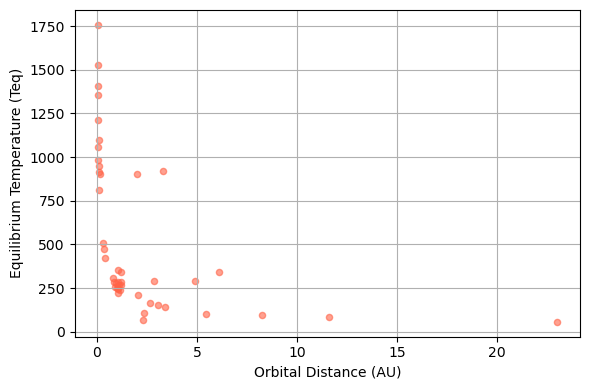

In [7]:
#1) Teq vs orbital distance scatter plot


plt.figure(figsize=(6,4))
#plt.plot(sample["pl_orbsmax"], sample["Teq"], linestyle = "--", alpha = 0.5)
plt.scatter(sample["pl_orbsmax"], sample["Teq"], s = 20, c = "tomato", alpha = 0.6)
plt.xlabel ("Orbital Distance (AU)")
plt.ylabel("Equilibrium Temperature (Teq)")
plt.grid(True)
plt.tight_layout()

plt.show()

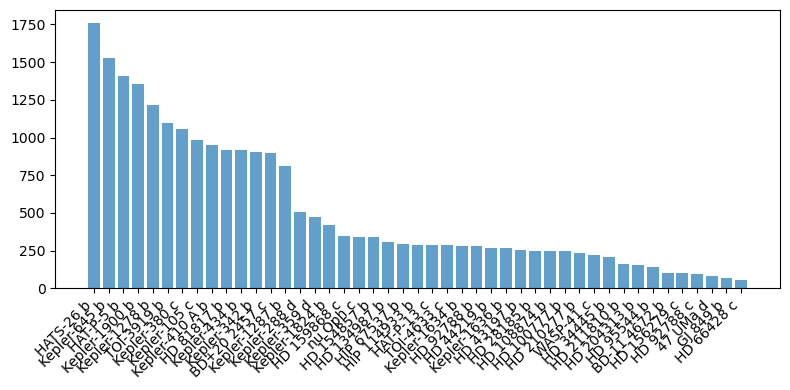

In [9]:
sorted_df = sample.sort_values(by = 'Teq', ascending = False)

plt.figure(figsize=(8,4))
names = sorted_df["pl_name"]
temps = sorted_df["Teq"]
plt.bar(names, temps, alpha = 0.7)
plt.xticks(rotation = 45, ha="right")
plt.tight_layout()
plt.show()

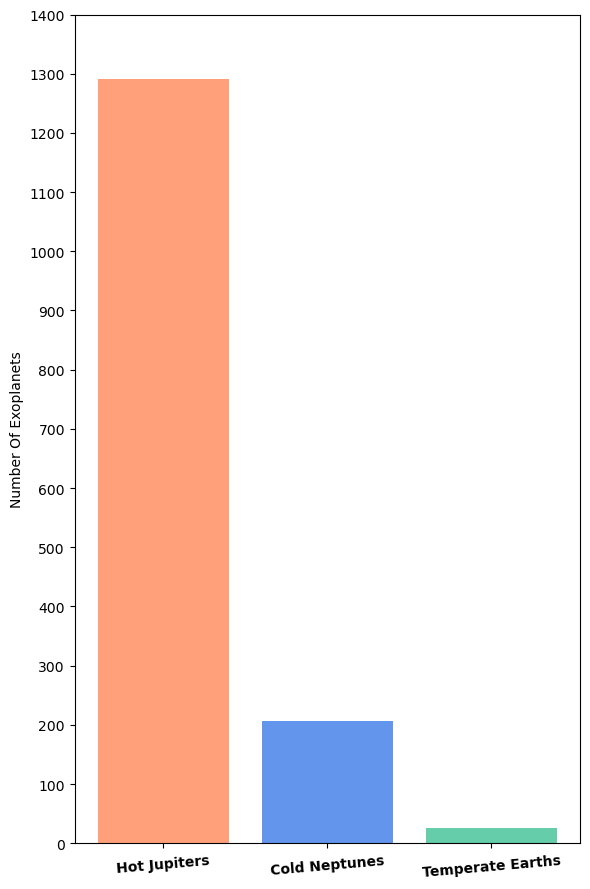

In [69]:
df_final = pd.read_csv("raw_data/clean_raw_data.csv", engine='python')

hot = df_final[
                (df_final["pl_orbsmax"] < 0.5) &
                (df_final["st_teff"] > 5900)
               ]

temperate = df_final[
                    (df_final["pl_orbsmax"] >= 0.8) &
                    (df_final["pl_orbsmax"] <= 1.2) &
                    (df_final["st_teff"] >= 5500) &
                    (df_final["st_teff"] <= 5900)
                    ]

cold = df_final[
                (df_final["pl_orbsmax"] > 2.0) &
                (df_final["st_teff"] < 5900)
               ]


count = [len(hot), len(cold), len(temperate)]
name = ["Hot Jupiters", "Cold Neptunes", "Temperate Earths"]
colors = ["lightsalmon", "cornflowerblue", "mediumaquamarine"]
plt.figure(figsize=(6,9))
plt.bar(name, count, color = colors)
plt.yticks(np.arange(0, 1500, 100))
plt.xticks(rotation = 5)
plt.ylabel("Number Of Exoplanets")
for label in plt.gca().get_xticklabels():
    label.set_fontweight('bold')
#plt.grid(True)
plt.savefig("figures/teq_bar_chart.png", dpi=200)
plt.tight_layout()
plt.show()

In [64]:
total = len(hot) + len(cold) + len(temperate)
print(total)

1524
